# 1.0 Text analysis

* Skip/Remove wells/sections containing <5 sentences. These do not contain the wellbore history as it was not present on the factpages.
      - Could remove sections/wells without "wellbore history". This might be a safer option.

1. Tokenization
2. N-grams
3. Stop word removal
4. Lemmatization
5. POS tagging
6. Named Entity Recognition

* **NLP Process workflow**
1. Tokenization --> Splits text into pieces (tokens) and remove punctuation
2. Stopword removal --> Removes commonly used words such as "the", "and", "is", which are not relevant to the analysis.
3. Stemming and lemmatization --> Reduces words to base form to be analyzed as a single item
4. P.O.S. Tagging --> Tag words to be part of speech (such as verb, noun) based on definition and context
5. Information retrieval --> Extracts relevant information from the source

# Tokenizing, Lemmatizing & Cleaning

In [2]:
import glob
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string
import re
import copy
import os

# Download necessary NLTK models and lists
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Set number of documents we want to process
NumberOfDocs = 3

lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize_tokens(tokens):
    # Clean and lemmatize list of tokens
    lemmatizer = WordNetLemmatizer()
    unwanted_chars = string.punctuation + "''"
    digit_pattern = re.compile(r'^\d+$|^[\d\/\-]+$')
    float_pattern = re.compile(r'^\d+\.\d+$')
    stop_words = set(stopwords.words('english'))
    cleaned_and_lemmatized_tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(word))
        for word in tokens 
        if word not in stop_words and 
        not any(char in word for char in unwanted_chars) and 
        not digit_pattern.match(word) and 
        not float_pattern.match(word) and 
        len(word) > 2
    ]
    #print("Processed tokens:", cleaned_and_lemmatized_tokens) # Debugging print statement
    return cleaned_and_lemmatized_tokens

def get_wordnet_pos(word):
    # Map POS tag to first character lemmatize() accepts.
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Directory path to all .txt files
txtDocumentsPath = r'C:\Users\Preben\Desktop\GFK\01. MASTER THESIS\02 Data analysis workshop\Working folder\Wellbore history\*.txt'
filepaths = glob.glob(txtDocumentsPath)[:NumberOfDocs]
#print(filepaths)

documents = []

for filepath in filepaths:
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read().lower()
        tokens = word_tokenize(text)
        #print("Original tokens:", tokens) # Debugging print statement
        cleaned_and_lemmatized_tokens = clean_and_lemmatize_tokens(tokens)  # Call the function
        documents.append(cleaned_and_lemmatized_tokens)  # Append the result to documents

#documents_copy = copy.deepcopy(documents)
documents_named = [(os.path.basename(filepath), tokens) for filepath, tokens in zip(filepaths, documents)]

print(f"Documents contains {len(documents)} number of lists.")

for document_name, token_list in documents_named:
    num_tokens = len(token_list)
    print(f"Number of tokens in {document_name}: {num_tokens}")
    if num_tokens == 0:
        print(f"Document {document_name} has zero tokens.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Preben\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Preben\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Preben\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Preben\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Documents contains 3 number of lists.
Number of tokens in 30_2-1.txt: 265
Number of tokens in 30_2-2.txt: 255
Number of tokens in 30_2-3.txt: 244


# Vectorizing the cleaned text

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Joining the tokens back into strings for each document
documents_joined = [" ".join(doc) for doc in documents]

# Initializing the CountVectorizer
vectorizer = CountVectorizer()

# Fitting the model and transforming the data
X = vectorizer.fit_transform(documents_joined)

# Getting the feature names (words)
features = vectorizer.get_feature_names_out()

# Getting the counts for each word in each document
counts = X.toarray()

# Display the feature names and counts
print(features)
print(counts)
#print(documents_joined)


['abandon' 'accident' 'accumulation' 'actual' 'age' 'air' 'also'
 'although' 'altogether' 'analysis' 'ancotherm' 'appraisal' 'appraise'
 'approach' 'approx' 'approximately' 'average' 'balder' 'bearing' 'bed'
 'believe' 'bht' 'bit' 'bottom' 'brent' 'case' 'caught' 'cause' 'check'
 'choke' 'circulation' 'close' 'co2' 'coal' 'column' 'common' 'completely'
 'complex' 'conclude' 'condensate' 'condense' 'condition' 'conduct'
 'confirm' 'contact' 'content' 'conventional' 'core' 'corer' 'correction'
 'could' 'cut' 'cutting' 'data' 'day' 'december' 'deeper' 'deepest' 'deg'
 'delta' 'density' 'depth' 'detect' 'diamond' 'diminish' 'disappear'
 'discovery' 'dissolve' 'distance' 'distinct' 'dolomite' 'drake' 'drill'
 'drilling' 'dst' 'due' 'dyvi' 'early' 'eight' 'eighteen' 'eiriksson'
 'eleven' 'encounter' 'end' 'eocene' 'establish' 'estimate' 'etive' 'fail'
 'fault' 'field' 'fill' 'filtrate' 'finish' 'first' 'five' 'flow' 'fluid'
 'fluorescence' 'formation' 'found' 'free' 'gas' 'gauge' 'gel' 'gene

# Plot Co-Occurrence

Number of words with no co-occurrences: 0


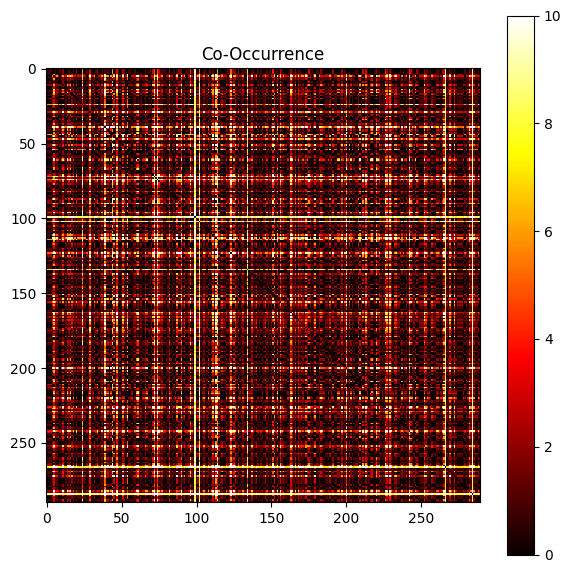

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the co-occurrence matrix
cooccurrence = np.dot(counts.T, counts)

# Subtract the diagonal values (to remove self-co-occurrences)
np.fill_diagonal(cooccurrence, 0)

#Identify words with non-zero counts (i.e. words that appear in the documents)
non_zero_words = np.sum(counts, axis=0) !=0

#Filter the co-occurence matrix to include only non-zero words
cooccurrence_filtered = cooccurrence[non_zero_words][:, non_zero_words]

# Sum of co-occurrences for each word
sum_cooccurrences = np.sum(cooccurrence, axis=0)

# Count how many words have zero co-occurrences
no_cooccurrence_count = np.sum(sum_cooccurrences == 0)
print(f"Number of words with no co-occurrences: {no_cooccurrence_count}")

# Plotting the co-occurrence matrix
plt.figure(figsize=(7, 7))
img = plt.imshow(cooccurrence_filtered, cmap='hot', interpolation='nearest')
img.set_clim([0, 10])
plt.colorbar()
plt.title('Co-Occurrence')
plt.savefig('foo.png')
plt.show()

#axes show the number of words


# Plot Joint Probability Matrix

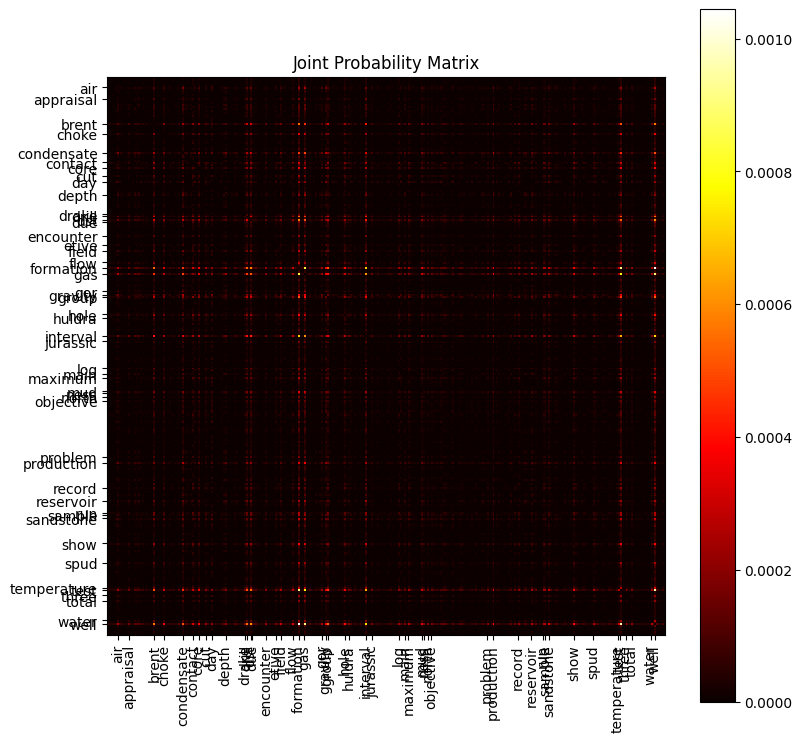

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Define a threshold for significant co-occurrence for labeling
threshold = 800  # Adjust this value

# Calculate the sum of co-occurrences for each word
cooccurrence_sums = np.sum(cooccurrence_filtered, axis=1)

# Create lists of labels for positions that meet the threshold
labels = []
tick_positions = []
for i, sum_val in enumerate(cooccurrence_sums):
    if sum_val > threshold:
        labels.append(features[i])
        tick_positions.append(i)

# Plotting the joint probability matrix
plt.figure(figsize=(9, 9))
plt.imshow(joint_prob_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()

# Setting the filtered tick labels and positions for the matrix
# Only set the labels for ticks that meet the threshold
plt.xticks(ticks=tick_positions, labels=labels, rotation=90)
plt.yticks(ticks=tick_positions, labels=labels)
plt.title("Joint Probability Matrix")
plt.savefig('JointProbMatrix.png')
plt.show()


# Plotting Co-Occurrence Network

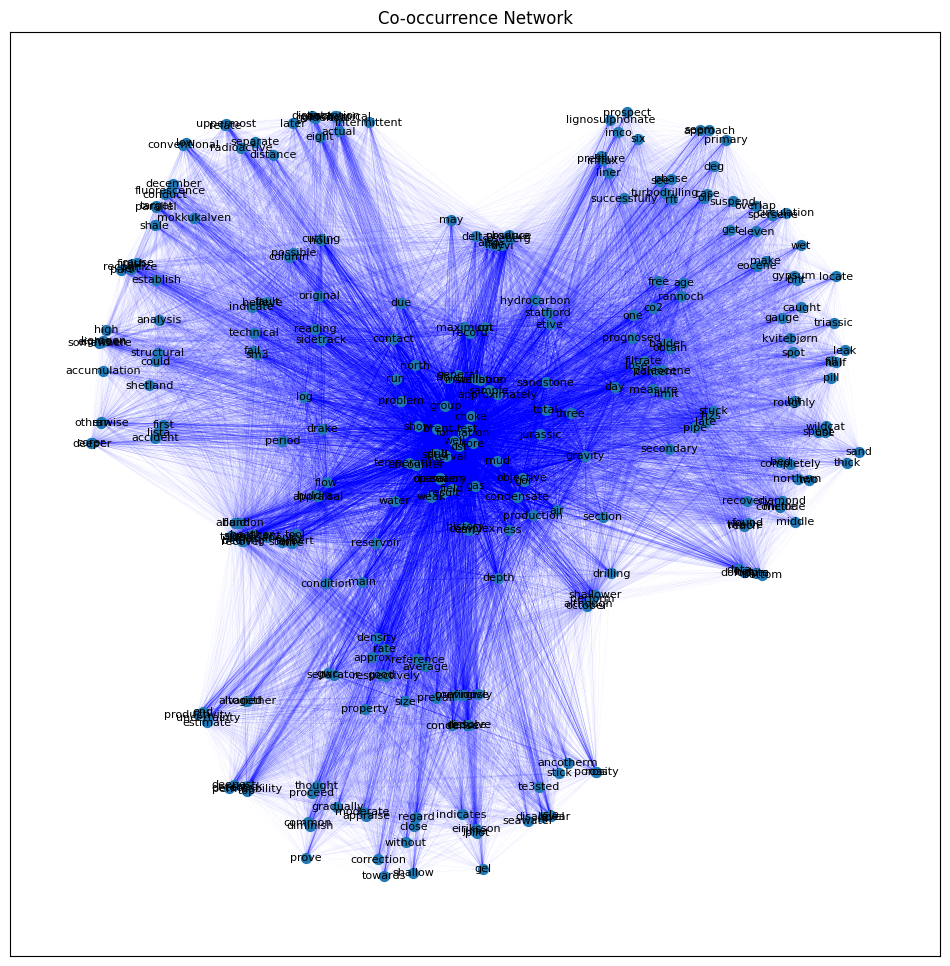

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the co-occurrence matrix
G = nx.from_numpy_array(cooccurrence)

# Relabel nodes to correspond to the bag of words vocabulary
mapping = {node: word for node, word in zip(G.nodes(), features)}
G = nx.relabel_nodes(G, mapping)

# Calculate line widths relative to the maximum weight
weights = nx.get_edge_attributes(G, 'weight')
max_weight = max(weights.values())
LWidths = [2 * weights[edge] / max_weight for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Positioning the nodes of the graph
nx.draw_networkx(G, pos, width=LWidths, node_size=50, edge_color='blue', font_size=8, with_labels=True)
plt.title("Co-occurrence Network")
plt.savefig('co-occurenceNetwork.png')
plt.show()


# Plotting Co-Occurrence Network with the strongest relationships

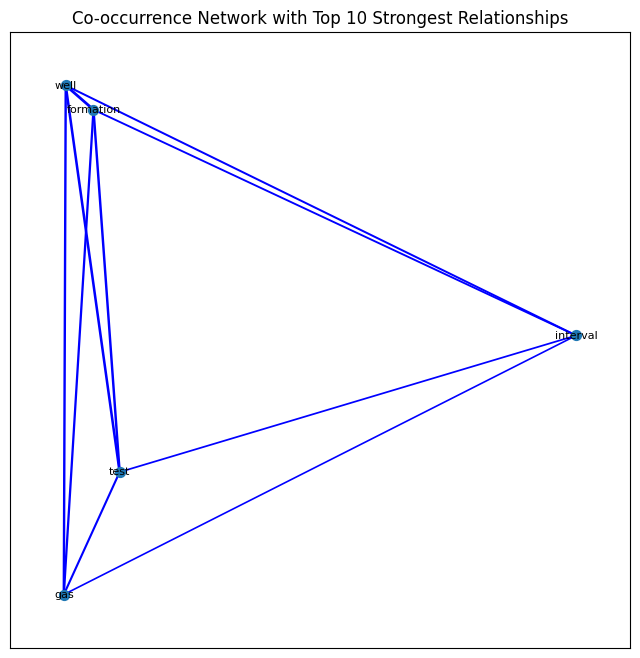

In [165]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the top threshold number strongest relationships we want to show
top = 10

# Create a graph from the co-occurrence matrix
G = nx.from_numpy_array(cooccurrence)

# Relabel nodes to correspond to the bag of words vocabulary
mapping = {node: word for node, word in zip(G.nodes(), features)}
G = nx.relabel_nodes(G, mapping)

# Get all edges with their weights
edges_with_weights = nx.get_edge_attributes(G, 'weight').items()

# Sort edges by weight in descending order and select the top relationships
top_edges = sorted(edges_with_weights, key=lambda x: x[1], reverse=True)[:top]

# Extract the top edges and their weights
top_edge_pairs = [edge for edge, _ in top_edges]
top_edge_weights = [weight for _, weight in top_edges]

# Create a new graph with only the top edges and their weights
G_top_edges = nx.Graph()
for (u, v), weight in zip(top_edge_pairs, top_edge_weights):
    G_top_edges.add_edge(u, v, weight=weight)

# Calculate positions for all nodes in the full graph for consistency
pos = nx.spring_layout(G)

# Filter layout positions to include only positions for nodes in the top edges
top_nodes = G_top_edges.nodes()
pos_filtered = {node: pos[node] for node in top_nodes if node in pos}

# Calculate line widths for top edges
max_weight = max(nx.get_edge_attributes(G_top_edges, 'weight').values())
LWidths = [2 * G_top_edges[u][v]['weight'] / max_weight for u, v in G_top_edges.edges()]

# Draw the graph with only the top edges
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G_top_edges, pos_filtered, width=LWidths, edge_color='blue')
nx.draw_networkx_nodes(G_top_edges, pos_filtered, node_size=50)
nx.draw_networkx_labels(G_top_edges, pos_filtered, font_size=8)

plt.title("Co-occurrence Network with Top 10 Strongest Relationships")
plt.savefig('co-occurenceNetwork_top10_edges.png')
plt.show()


# Printing a table showing how many times a neighboring word appear alongside 'word'

In [7]:
import networkx as nx

word = 'leak'
threshold = 3 # Setting threshold weight

if word in G:
    # Get the neighbors and the weights of the connecting edges
    neighbors = G[word]
    # Create a list of tuples (neighbor, weight)
    neighbor_weights = [(neighbor, G[word][neighbor]['weight']) for neighbor in neighbors if G[word][neighbor]['weight']>=threshold]
    # Sort the list in descending order
    neighbor_weights.sort(key=lambda x: x[1], reverse=True) # By weight
    #neighbor_weights.sort(key=lambda x: [1], reverse=True) # Alphabetical order

    #Print the table header
    print(f"Neigbors of '{word}' and their weights")
    print("{:<20} | {:<10}".format("Neighbor", "Weight"))
    print("-" * 32) # Print separator line

    #Print each neighbor and its weight
    for neighbor, weight in neighbor_weights:
        print("{:<20} | {:>10}".format(neighbor, weight))

else:
    print(f"Word '{word}' not found in the vocabulary")
    

Neigbors of 'leak' and their weights
Neighbor             | Weight    
--------------------------------
formation            |          8
well                 |          8
gas                  |          7
test                 |          7
gravity              |          6
condensate           |          5
day                  |          5
dst                  |          4
production           |          4
sandstone            |          4
air                  |          3
brent                |          3
choke                |          3
content              |          3
core                 |          3
cut                  |          3
drill                |          3
etive                |          3
gor                  |          3
group                |          3
hole                 |          3
interval             |          3
lose                 |          3
maximum              |          3
mud                  |          3
one                  |          3
paleocene   

# Plotting Co-Occurrence Network with a specific word

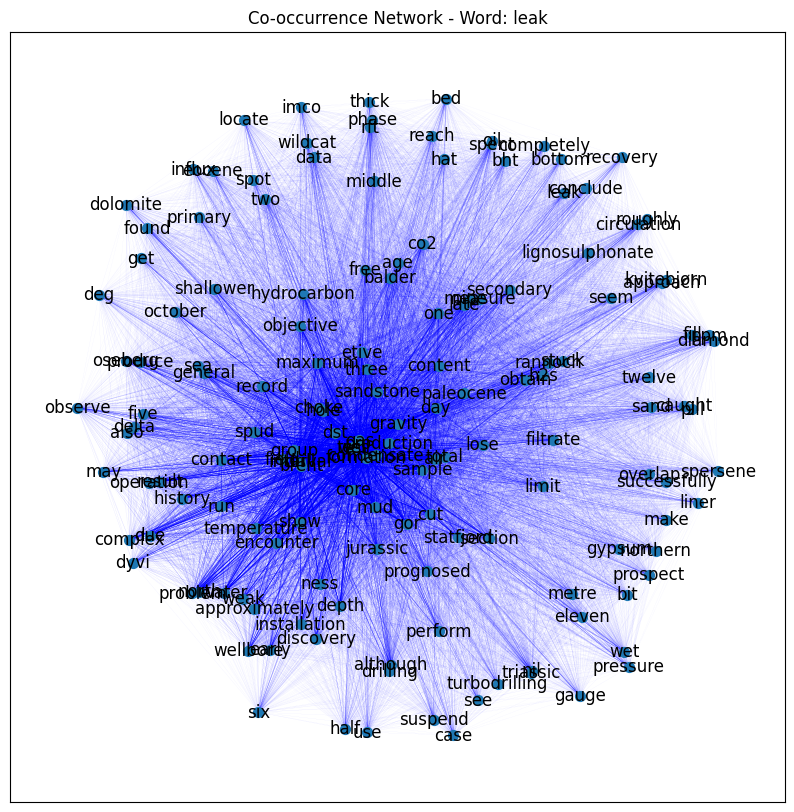

In [129]:
# Find the node for the given word
word = 'leak'
if word in G: # If the word is present in the graph made from co-occurrence matrix
    # Find neighbors of the word
    nbrs = list(G.neighbors(word))
    
    # Subgraph containing the word and its neighbors
    sub_nodes = [word] + nbrs
    H = G.subgraph(sub_nodes)
    
    # Calculate line widths for the subgraph, proportional to the edge weights
    sub_weights = nx.get_edge_attributes(H, 'weight')
    max_sub_weight = max(sub_weights.values(), default=1)
    LWidths = [2 * sub_weights[edge] / max_sub_weight for edge in H.edges()]
    
    # Draw the subgraph
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(H)  # Positioning the nodes of the graph
    nx.draw_networkx(H, pos, width=LWidths, node_size=50, edge_color='blue', font_size=12, with_labels=True)
    plt.title(f"Co-occurrence Network - Word: {word}")
    plt.savefig('Co-occurenceWord-Leakage.png')
    plt.show()
else:
    print(f"Word '{word}' not found in the vocabulary.")


# Creating a WordCloud

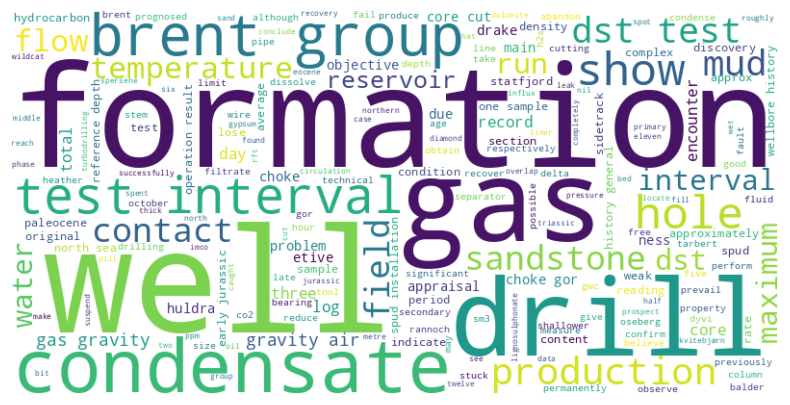

In [159]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten 'documents' and join into a single string
combined_text = " ".join(" ".join(doc) for doc in documents)

# Generate the word cloud using the combined cleaned text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()


# Clusters

## Cluster analysis using K-means method
Cluster analysis, also known as clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups. 
It is a common technique for statistical data analysis used in many fields.
- **Initialization**: Start by selecting k initial centroids. These can be chosen randomly from the dataset or using other methods. Each centroid represents the center of a cluster
- **Assignment step**: Assign each data point to the closest centroid. The "closeness" is typically measured using the Euclidean distance, although other distances (metric) can be used depending on the nature of the data (spatial data, text, images etc). After this step, each data point is associated with exactly one centroid, thus forming k clusters.
- **Update step**: Once all points are assigned to clusters, recalculate the centroids by taking the mean of all points assigned to each cluster. This step moves the centroid to the center of the cluster.
- **Repeat**: Repeat the assignment and update steps until the centroids no longer move significantly or the assignments no longer change. This means the algorithm has converged and the clusters are stable.
- **Result**: The output is a set of clusters with the data points assigned to them and a set of centroids representing the center of each cluster.cluster.

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


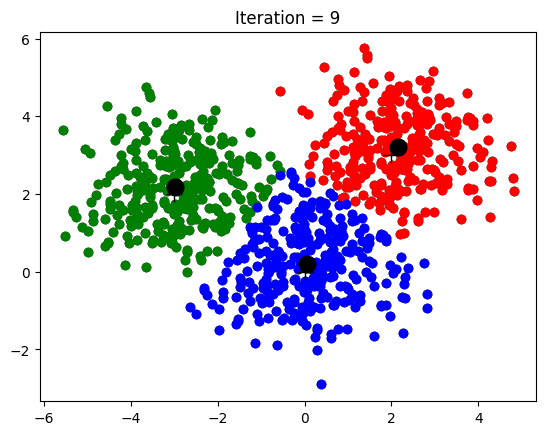

In [212]:
import numpy as np
import matplotlib.pyplot as plt

# Make synthetic data
data0 = np.random.randn(300, 2)
xc0 = np.array([[0, 0], [-3, 2], [2, 3]])  # True cluster centers
data = np.vstack([data0 + xc0[i] for i in range(3)])

# Plot initial data
plt.figure(1)
plt.plot(data[:, 0], data[:, 1], 'r.', markersize=12)
plt.plot(xc0[:, 0], xc0[:, 1], 'k+', markersize=12, linewidth=2)
plt.title('Data')

# Number of points and dimensions
nop, ndim = data.shape
k = 3  # Assume number of clusters
ind = np.random.choice(nop, k, replace=False)
xc = data[ind, :]  # Choose trial centers of clusters
labels_cur = np.zeros(nop)
labels_prev = np.ones(nop)
# Initialize distances
D = np.zeros((nop, k))
it = 1
# Iterate to find the correct centers
while not np.array_equal(labels_cur, labels_prev):
    labels_prev = labels_cur.copy()
    # Calculate squared distances between data points and trial cluster centers
    for i in range(k):
        D[:, i] = np.sum((data - xc[i, :]) ** 2, axis=1) # Distance between clusters; D = (x-x_c)^2 +(y-y_c)^2
    # Assign points to the nearest cluster
    labels_cur = np.argmin(D, axis=1)
    # Update trial cluster centers
    for i_clust in range(k):
        xc[i_clust, :] = data[labels_cur == i_clust, :].mean(axis=0)
    
    it += 1
    print('Iteration:', it)
    # Plot trial clusters marked with different color
    plt.figure(1)
    plt.clf()
    plt.hold = True  # For older versions of matplotlib, ensures hold is on
    plt.plot(data[:, 0], data[:, 1], 'k.', markersize=12)
    plt.plot(data[labels_cur == 0, 0], data[labels_cur == 0, 1], 'r.', markersize=12)
    plt.plot(data[labels_cur == 1, 0], data[labels_cur == 1, 1], 'g.', markersize=12)
    plt.plot(data[labels_cur == 2, 0], data[labels_cur == 2, 1], 'b.', markersize=12)
    plt.plot(xc[:, 0], xc[:, 1], 'ko', markersize=12, linewidth=2)
    plt.plot(xc0[:, 0], xc0[:, 1], 'k+', markersize=12, linewidth=2)
    plt.title('Iteration = {}'.format(it))
    plt.draw()
    #plt.pause(0.5)


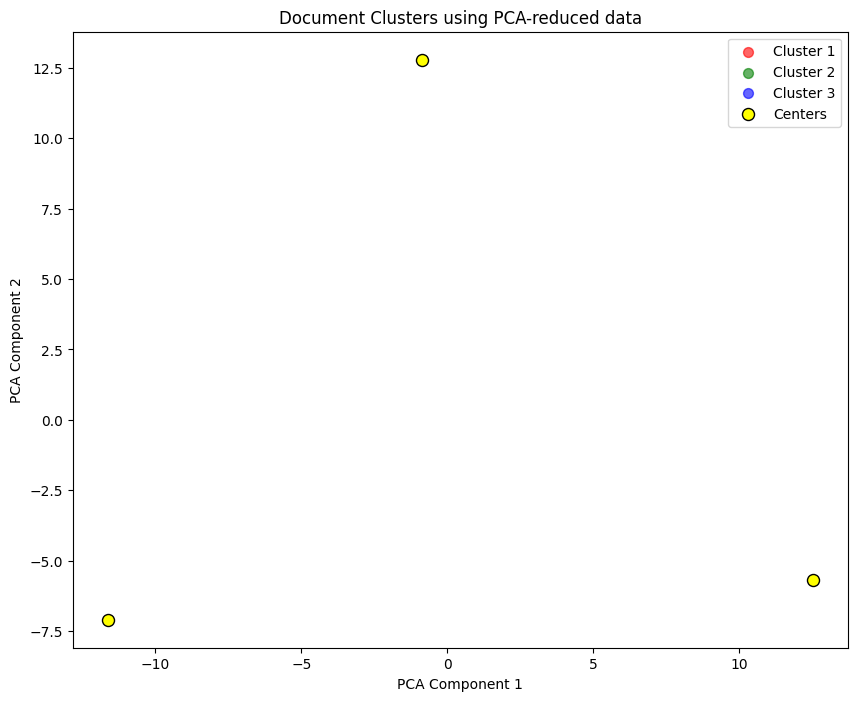

In [227]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Number of clusters
k = 3  # Adjust this as necessary

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
labels = kmeans.labels_

# Optional: Reduce dimensionality for visualization purposes
pca = PCA(n_components=2) # Principal Component Analysis
reduced_data = pca.fit_transform(X.toarray())

# Plotting the clusters
plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b']  # Change as per the number of clusters
for i in range(k):
    # Plot points assigned to each cluster
    points = reduced_data[labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=50, color=colors[i], label=f'Cluster {i+1}', alpha=0.6)

# Plot the cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='yellow', marker='.', edgecolors='black', label='Centers')

plt.title('Document Clusters using PCA-reduced data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


# Finding Keyword in text

* Here we need to import the text files **with** *punctuation* and *stopwords* as the algorithm uses those as a way to sort out the key phrases and words.
* Filter out headers and non-relevant re-occurring phrases. I.e. "Wellbore history general"
* **To do**
  1. Take a look at the first cell in this file, make the parameters consistent throughout the file - ref. 'documents'

In [209]:
from rake_nltk import Rake
import os

NumberOfDocs = 3

def read_text_files_from_folder(txtDocumentsPath, number_of_docs):
    documents_original = []
    count = 0
    for filename in os.listdir(txtDocumentsPath):
        if filename.endswith('.txt') and count < number_of_docs:
            file_path = os.path.join(txtDocumentsPath, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                documents_original.append(text)
                count += 1
    return documents_original

# Directory path to the folder containing .txt files
txtDocumentsPath = r'C:\Users\Preben\Desktop\GFK\01. MASTER THESIS\02 Data analysis workshop\Working folder\Wellbore history'
documents_original = read_text_files_from_folder(txtDocumentsPath, NumberOfDocs)

# Initialize Rake
r = Rake()

# Extract keywords from each document
for document in documents_original:
    r.extract_keywords_from_text(document)
    ranked_phrases = r.get_ranked_phrases_with_scores()
    print(f"Key phrases and their scores")
    print("{:<5} | {:<10}".format("Score", "Keyword"))
    print("-" * 32) # Separator line

    for score, keyword in ranked_phrases:
        if score > 5:
            print("{:<5} | {:>10}".format(round(score,2), keyword))
    print("\n")


Key phrases and their scores
Score | Keyword   
--------------------------------
26.3  | 1 wellbore history general well 30
24.0  | 30 cm thick sandstone bed
16.0  | submersible installation dyvi delta
14.0  | results wildcat well 30
12.86 | late paleocene balder formation
12.86 | late paleocene balder formation
12.86 | early jurassic statfjord formation
11.29 | three tests produced gas
9.5   | middle jurassic age
9.5   | early triassic age
9.0   | spersene xp 20
9.0   | northern north sea
9.0   | located roughly mid
9.0   | leaking liner overlap
9.0   | five rft runs
9.0   | 17 may 1982
8.75  | dst 3 tested
8.67  | testing three dst
8.5   | six ppm h2s
8.5   | oseberg field complex
8.5   | although oil shows
8.5   | 12 october 1982
8.3   | dst 1 tested
8.0   | measured bht seemed
8.0   | completely hydrocarbon filled
8.0   | 85 l condensate
7.78  | approximately 2564 sm3
7.75  | dst 2 tested
7.17  |    one 2 3
7.17  |    one 2 3
6.71  | maximum gas production
5.86  | statfjord formati

In [210]:
from rake_nltk import Rake
import os

NumberOfDocs = 3

def read_text_files_from_folder(txtDocumentsPath, number_of_docs):
    documents_original = []
    count = 0
    for filename in os.listdir(txtDocumentsPath):
        if filename.endswith('.txt') and count < number_of_docs:
            file_path = os.path.join(txtDocumentsPath, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                documents_original.append(text)
                count += 1
    return documents_original

# Directory path to the folder containing .txt files
txtDocumentsPath = r'C:\Users\Preben\Desktop\GFK\01. MASTER THESIS\02 Data analysis workshop\Working folder\Wellbore history'
documents_original = read_text_files_from_folder(txtDocumentsPath, NumberOfDocs)

# Initialize Rake
r = Rake()

# Prepare to accumulate results
all_keywords_with_scores = []

# Extract keywords from each document
for document in documents_original:
    r.extract_keywords_from_text(document)
    ranked_phrases = r.get_ranked_phrases_with_scores()
    all_keywords_with_scores.extend(ranked_phrases)

# Sorting all keywords by score in descending order for a combined output
all_keywords_with_scores.sort(reverse=True, key=lambda x: x[0])

# Print all keywords and their scores
print(f"Consolidated key phrases and their scores")
print("{:<10} | {:<50}".format("Score", "Keyword"))
print("-" * 63)  # Separator line

for score, keyword in all_keywords_with_scores:
    if score > 5:
        print("{:<10.2f} | {:<50}".format(score, keyword))


Consolidated key phrases and their scores
Score      | Keyword                                           
---------------------------------------------------------------
27.47      | 3 wellbore history general well 30                
26.30      | 1 wellbore history general well 30                
26.10      | dst 3 confirmed moderate reservoir properties     
25.00      | testing three drill stem tests                    
25.00      | drilling proceeded without significant problems   
24.72      | 2 wellbore history general well 30                
24.00      | 30 cm thick sandstone bed                         
23.50      | testing three drill stem tests                    
22.67      | reducing uncertainties regarding well productivity
16.00      | submersible installation dyvi delta               
16.00      | submersible installation dyvi delta               
16.00      | 07 hours flow period                              
16.00      | wire line fluid samples                          

# Just some random notes

In [ ]:
from requests_html import HTMLSession

def extract_text():
    s = HTMLSession()
    url = '...'
    response = s.get(url)
    return response.html.fin('div#article-body', first=True).text